In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('emails.csv')

In [3]:
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [4]:
df['spam'].value_counts()

spam
0    4360
1    1368
Name: count, dtype: int64

<Axes: xlabel='spam', ylabel='count'>

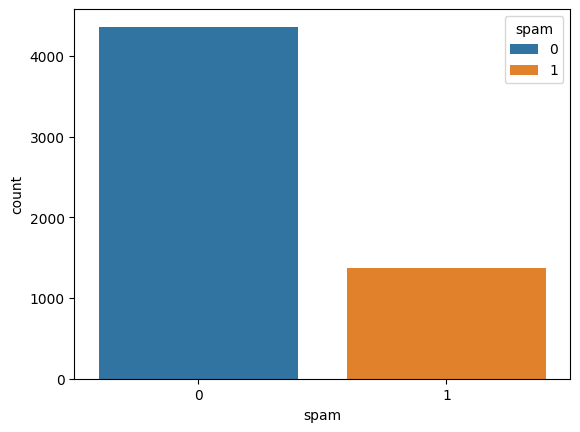

In [9]:
sns.countplot(x='spam', data=df, hue="spam")

In [10]:
# remove duplicate value
df.drop_duplicates(inplace=True)

In [11]:
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [12]:
df['spam'].value_counts()

spam
0    4327
1    1368
Name: count, dtype: int64

In [13]:
# check null value
df.isnull().sum()

text    0
spam    0
dtype: int64

## Separate X and Y

In [16]:
x = df.text.values

In [17]:
y = df.spam.values

## Split Dataset

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Data Preprocessing

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
cv = CountVectorizer()

In [23]:
x_train = cv.fit_transform(x_train)

In [27]:
x_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## ML Algorithm

In [28]:
from sklearn.naive_bayes import MultinomialNB

In [29]:
model = MultinomialNB()

In [30]:
# train the model
model.fit(x_train, y_train)

MultinomialNB()

In [31]:
# check test dataset
x_test = cv.transform(x_test)

In [32]:
x_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [2, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [33]:
# check test dataset accuracy
model.score(x_test, y_test)

0.9912203687445127

## Check by Input Data

In [57]:
# emails = ['Hi this is Shahriar', 'Send me your credit card pin']

emails = []
emails = [input("Enter list items: ")]
emails

['Send me your credit card pin']

In [58]:
cv_emails = cv.transform(emails)

In [59]:
model.predict(cv_emails)

array([1], dtype=int64)